In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [8]:
df = pd.read_csv('dataset.csv')
df.columns = [i for i in range(df.shape[1])]
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.588694,0.910513,-2.532528e-07,0.541228,0.874950,-0.033288,0.511266,0.807403,-0.055883,0.522403,...,0.661677,0.697258,-0.086405,0.640721,0.751607,-0.073863,0.627956,0.792952,-0.055287,1
1,0.594955,0.897774,-1.868768e-07,0.545912,0.868296,-0.033575,0.512405,0.804072,-0.056865,0.522213,...,0.659857,0.695717,-0.086762,0.641552,0.748080,-0.074069,0.629341,0.784476,-0.055867,1
2,0.598631,0.914106,-1.861246e-07,0.546468,0.876585,-0.035671,0.512989,0.808012,-0.059843,0.522631,...,0.660697,0.703604,-0.089144,0.642251,0.762821,-0.078446,0.630060,0.807157,-0.060186,1
3,0.587705,0.905006,-2.189523e-07,0.541120,0.870752,-0.037263,0.511958,0.806211,-0.062949,0.522681,...,0.660798,0.702909,-0.090980,0.643261,0.762421,-0.078323,0.631241,0.802291,-0.059307,1
4,0.592814,0.898235,-1.430076e-07,0.545891,0.874364,-0.043679,0.514785,0.816463,-0.072225,0.523828,...,0.660121,0.706104,-0.097053,0.642677,0.768103,-0.086921,0.630832,0.811574,-0.068599,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,0.811249,0.990858,-2.694881e-07,0.735988,0.959428,-0.040063,0.672229,0.860494,-0.060814,0.632943,...,0.871574,0.663360,-0.079587,0.890626,0.603687,-0.081186,0.906934,0.544761,-0.073671,iloveu
395,0.804124,0.984926,-3.265752e-07,0.729680,0.959845,-0.042541,0.666961,0.867845,-0.066553,0.630120,...,0.865285,0.664072,-0.086291,0.883503,0.604019,-0.086632,0.900579,0.544990,-0.077932,iloveu
396,0.807946,0.989003,-2.727235e-07,0.730491,0.963193,-0.044505,0.666094,0.863950,-0.066579,0.628715,...,0.864099,0.656518,-0.081124,0.883426,0.595764,-0.086624,0.899452,0.537810,-0.082759,iloveu
397,0.794624,0.995785,-2.169090e-07,0.725904,0.967907,-0.047476,0.665760,0.872929,-0.073566,0.625721,...,0.860826,0.662500,-0.089781,0.880225,0.600083,-0.097367,0.895779,0.535719,-0.095167,iloveu


In [9]:
df = df.rename(columns={63: 'Output'})
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Output
0,0.588694,0.910513,-2.532528e-07,0.541228,0.874950,-0.033288,0.511266,0.807403,-0.055883,0.522403,...,0.661677,0.697258,-0.086405,0.640721,0.751607,-0.073863,0.627956,0.792952,-0.055287,1
1,0.594955,0.897774,-1.868768e-07,0.545912,0.868296,-0.033575,0.512405,0.804072,-0.056865,0.522213,...,0.659857,0.695717,-0.086762,0.641552,0.748080,-0.074069,0.629341,0.784476,-0.055867,1
2,0.598631,0.914106,-1.861246e-07,0.546468,0.876585,-0.035671,0.512989,0.808012,-0.059843,0.522631,...,0.660697,0.703604,-0.089144,0.642251,0.762821,-0.078446,0.630060,0.807157,-0.060186,1
3,0.587705,0.905006,-2.189523e-07,0.541120,0.870752,-0.037263,0.511958,0.806211,-0.062949,0.522681,...,0.660798,0.702909,-0.090980,0.643261,0.762421,-0.078323,0.631241,0.802291,-0.059307,1
4,0.592814,0.898235,-1.430076e-07,0.545891,0.874364,-0.043679,0.514785,0.816463,-0.072225,0.523828,...,0.660121,0.706104,-0.097053,0.642677,0.768103,-0.086921,0.630832,0.811574,-0.068599,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,0.811249,0.990858,-2.694881e-07,0.735988,0.959428,-0.040063,0.672229,0.860494,-0.060814,0.632943,...,0.871574,0.663360,-0.079587,0.890626,0.603687,-0.081186,0.906934,0.544761,-0.073671,iloveu
395,0.804124,0.984926,-3.265752e-07,0.729680,0.959845,-0.042541,0.666961,0.867845,-0.066553,0.630120,...,0.865285,0.664072,-0.086291,0.883503,0.604019,-0.086632,0.900579,0.544990,-0.077932,iloveu
396,0.807946,0.989003,-2.727235e-07,0.730491,0.963193,-0.044505,0.666094,0.863950,-0.066579,0.628715,...,0.864099,0.656518,-0.081124,0.883426,0.595764,-0.086624,0.899452,0.537810,-0.082759,iloveu
397,0.794624,0.995785,-2.169090e-07,0.725904,0.967907,-0.047476,0.665760,0.872929,-0.073566,0.625721,...,0.860826,0.662500,-0.089781,0.880225,0.600083,-0.097367,0.895779,0.535719,-0.095167,iloveu


In [10]:
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)

Features shape = (399, 63)
Labels shape = (399,)


In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
svm = SVC(C=10, gamma=0.1, kernel='rbf')
svm.fit(x_train, y_train)

SVC(C=10, gamma=0.1)

In [12]:
y_pred = svm.predict(x_test)
y_pred

array(['2', 'iloveu', 'iloveu', '2', '3', '1', '2', '3', '2', '3', '1',
       '2', '2', 'iloveu', '1', '1', '3', '2', '3', '2', '2', '3', '2',
       'iloveu', '2', 'iloveu', '1', '1', '3', '2', '2', 'iloveu',
       'iloveu', '3', '1', '1', '1', '2', '2', 'iloveu', '2', 'iloveu',
       '1', '1', '3', '2', 'iloveu', '3', '2', '3', '3', '2', '3', '2',
       '3', 'iloveu', '1', '2', '1', '1', '1', '3', '1', 'iloveu', '2',
       'iloveu', '2', '1', '2', 'iloveu', '1', '3', '1', '1', '2', '1',
       'iloveu', 'iloveu', 'iloveu', 'iloveu'], dtype=object)

In [14]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
cf_matrix,f1, recall, precision

(array([[21,  2,  0,  0],
        [ 0, 22,  0,  0],
        [ 0,  1, 16,  0],
        [ 0,  0,  0, 18]], dtype=int64),
 0.9625000000000001,
 0.9625,
 0.9625)

<Axes: title={'center': 'Confusion Matrix - Indian Sign Language'}>

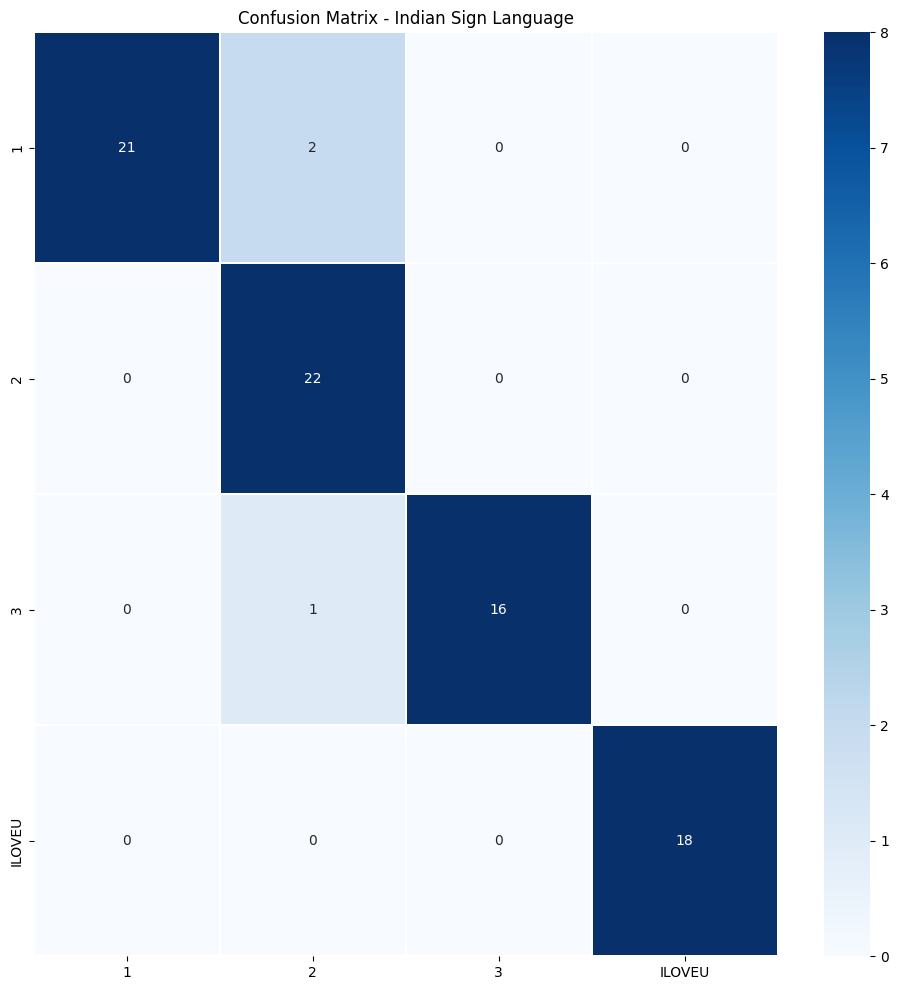

In [16]:
labels = sorted(list(set(df['Output'])))
labels = [x.upper() for x in labels]

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix - Indian Sign Language")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [17]:
import pickle

# save model
with open('model.pkl','wb') as f:
    pickle.dump(svm,f)